# 3\. BASH

### 3\.1

1\.a Make a new directory called `students` in your home. Download a csv file with the list of students of this lab from [here](https://www.dropbox.com/s/867rtx3az6e9gm8/LCP_22-23_students.csv) (use the `wget` command) and copy that to `students`. First check whether the file is already there

1\.b Make two new files, one containing the students belonging to PoD, the other to Physics.

1\.c For each letter of the alphabet, count the number of students whose surname starts with that letter.

1\.d Find out which is the letter with most counts.

1\.e Assume an obvious numbering of the students in the file (first line is 1, second line is 2, etc.), group students "modulo 18", i.e. 1,19,37,.. 2,20,38,.. etc. and put each group in a separate file

```bash
mkdir "./students"
cd "./students"

if [ ! -f ./LCP_22-23_students.csv ]
then
    wget https://www.dropbox.com/s/867rtx3az6e9gm8/LCP_22-23_students.csv
fi

grep "PoD" "./LCP_22-23_students.csv" > "./PoD_students.csv"
grep "Physics" "./LCP_22-23_students.csv" > "./Physics_students.csv"

max_count=0
max_letter="A"

for letter in {A..Z}
do
    count=$(awk -F '[, ]' 'NR>1 {print substr($1, 1, 1)}' "./LCP_22-23_students.csv" | grep -c "$letter")
    echo "$letter: $count" >> "./count_by_letters.csv"

    if [ $count -gt $max_count ]
    then
        max_count=$count
        max_letter=$letter
    fi
done

echo "The most frequent surname initial is: $max_letter."

awk -F ',' 'NR>1 {file="./group_"int((NR-2)%18)+1".txt"; print $0 >> file; close(file)}' ./LCP_22-23_students.csv

```

### 3\.2

2\.a Make a copy of the file `data.csv` removing the metadata and the commas between numbers; call it `data.txt`

2\.b How many even numbers are there?

2\.c Distinguish the entries on the basis of `sqrt(X^2 + Y^2 + Z^2)` is greater or smaller than `100*sqrt(3)/2`. Count the entries of each of the two groups.

2\.d Make `n` copies of data.txt (with `n` an input parameter of the script), where the i-th copy has all the numbers divided by i (with `1<=i<=n`).

```bash
grep -v '^#' data.csv | tr -d ',' > data.txt

even_numbers_count=$(grep -oE '\b[0-9]+\b' data.txt | awk '$1 % 2 == 0' | wc -l)
echo "Number of even numbers: $even_numbers_count."

num_greater=0
num_lower=0
threshold=$(echo "scale=6; 100 * sqrt(3) / 2" | bc -l)

while IFS=' ' read -r X Y Z Xp Yp Zp
do 
    distance=$(echo "scale=6; sqrt($X^2 + $Y^2 + $Z^2)" | bc -l)
    if [ $(echo "$distance > $threshold" | bc -l) -eq 1 ]
    then
        ((num_greater++))
    else
        ((num_lower++))
    fi

done < data.txt

echo "Number of distances higher than the treshold: $num_greater"
echo "Number of distances lower than the treshold: $num_lower"

read -p "Enter the number of files (n):" n

if [[ ! $n =~ ^[1-9][0-9]*$ ]]
then
    echo "Not valid input: n must be a positive integer"
    exit 1
fi

for (( i = 1; i <= n; i++ ))
do 
    while IFS=' ' read -r X Y Z Xp Yp Zp
    do
        X=$(echo "scale=6; $X / $i" | bc -l)
        Y=$(echo "scale=6; $Y / $i" | bc -l)
        Z=$(echo "scale=6; $Z / $i" | bc -l)
        Xp=$(echo "scale=6; $Xp / $i" | bc -l)
        Yp=$(echo "scale=6; $Yp / $i" | bc -l)
        Zp=$(echo "scale=6; $Zp / $i" | bc -l)

        echo "$X $Y $Z $Xp $Yp $Zp">> "./data_$i.txt"
    done < "data.txt"

done

echo "Copies created successfully"
```

# 4. Numpy

### 4.2

Find the outer product of the following two vectors (10 MINUTES)

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operations

In [8]:
import numpy as np

u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

print('Outer function:')
print(np.outer(u, v), '\n')

print('List comprehension:')
print(np.matrix([[u[i] * v[j] for j in range(4)] for i in range(4)]), '\n')

u_broadcasted = np.tile(u, (4, 1))
v_broadcasted = np.tile(v, (4, 1))

print('Broadcasting operations:')
print(u_broadcasted.T * v_broadcasted)

Outer function:
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

List comprehension:
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

Broadcasting operations:
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


### 4.4

Use np.linspace to create an array of 100 numbers between 0 and 2π (inclusive). (10 MINUTES)

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

[0.         0.63466518 1.26933037 1.90399555 2.53866073 3.17332591
 3.8079911  4.44265628 5.07732146 5.71198664]
[6.28318531 6.21971879 6.15625227 6.09278575 6.02931923 5.96585272
 5.9023862  5.83891968 5.77545316 5.71198664 5.64852012 5.58505361
 5.52158709 5.45812057 5.39465405 5.33118753 5.26772102 5.2042545
 5.14078798 5.07732146 5.01385494 4.95038842 4.88692191 4.82345539
 4.75998887 4.69652235 4.63305583 4.56958931 4.5061228  4.44265628
 4.37918976 4.31572324 4.25225672 4.1887902  4.12532369 4.06185717
 3.99839065 3.93492413 3.87145761 3.8079911  3.74452458 3.68105806
 3.61759154 3.55412502 3.4906585  3.42719199 3.36372547 3.30025895
 3.23679243 3.17332591 3.10985939 3.04639288 2.98292636 2.91945984
 2.85599332 2.7925268  2.72906028 2.66559377 2.60212725 2.53866073
 2.47519421 2.41172769 2.34826118 2.28479466 2.22132814 2.15786162
 2.0943951  2.03092858 1.96746207 1.90399555 1.84052903 1.77706251
 1.71359599 1.65012947 1.58666296 1.52319644 1.45972992 1.3962634
 1.33279688 1.2693

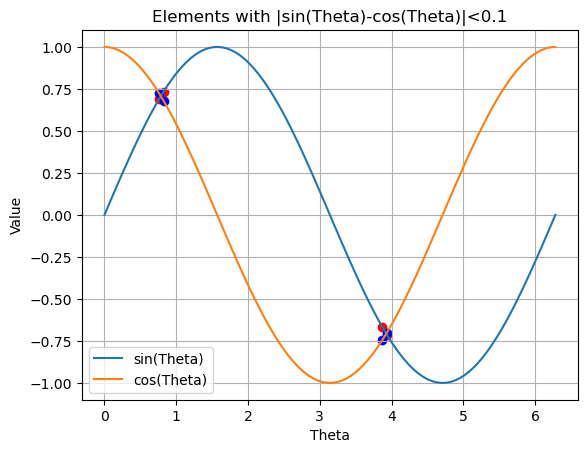

In [9]:
import numpy as np
import matplotlib.pyplot as plt

elements = np.linspace(0, 2* np.pi, 100)

every_10th_element = elements[::10]
reversed_element= elements[::-1]
close_elements = elements[np.abs(np.sin(elements) - np.cos(elements)) < 0.1 ]

print(every_10th_element)
print(reversed_element)
print(close_elements)

plt.plot(elements, np.sin(elements), label='sin(Theta)')
plt.plot(elements, np.cos(elements), label='cos(Theta)')

plt.scatter(close_elements, np.sin(close_elements), color='red')
plt.scatter(close_elements, np.cos(close_elements), color='blue')

plt.legend()
plt.grid()
plt.title('Elements with |sin(Theta)-cos(Theta)|<0.1')
plt.xlabel('Theta')
plt.ylabel('Value')
plt.show()

### 4.6 

Use broadcasting to create a grid of distances (15 MINUTES)

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [12]:
import numpy as np

route66 = [0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448]
distances = np.tile(route66, len(route66)) - np.tile(route66, len(route66))[:, np.newaxis]

print(distances)
print(distances * 1.60934)

[[    0   198   303 ...  1544  1913  2448]
 [ -198     0   105 ...  1346  1715  2250]
 [ -303  -105     0 ...  1241  1610  2145]
 ...
 [-1544 -1346 -1241 ...     0   369   904]
 [-1913 -1715 -1610 ...  -369     0   535]
 [-2448 -2250 -2145 ...  -904  -535     0]]
[[    0.        318.64932   487.63002 ...  2484.82096  3078.66742
   3939.66432]
 [ -318.64932     0.        168.9807  ...  2166.17164  2760.0181
   3621.015  ]
 [ -487.63002  -168.9807      0.      ...  1997.19094  2591.0374
   3452.0343 ]
 ...
 [-2484.82096 -2166.17164 -1997.19094 ...     0.        593.84646
   1454.84336]
 [-3078.66742 -2760.0181  -2591.0374  ...  -593.84646     0.
    860.9969 ]
 [-3939.66432 -3621.015   -3452.0343  ... -1454.84336  -860.9969
      0.     ]]


### 4.7 

Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask). (20 MINUTES)
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)


In [16]:
import numpy as np

N = 100

numbers = np.linspace(1, N, N)
mask = [True] * N
mask[0] = False

for i in range(2, int(N/2) + 1):
    for j in range(i, N):
        if numbers[j] % i == 0:
            mask[j] = False

print(numbers)
print(mask)
print(f'Prime numbers in the range (0, {N}):',  numbers[mask])

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100.]
[False, True, True, False, True, False, True, False, False, False, True, False, True, False, False, False, True, False, True, False, False, False, True, False, False, False, False, False, True, False, True, False, False, False, False, False, True, False, False, False, True, False, True, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, True, False, True, False, False, False, False, False, True, False, False, False, True, False, True, 

### 4.8

Diffusion using random walk (30 MINUTES)

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

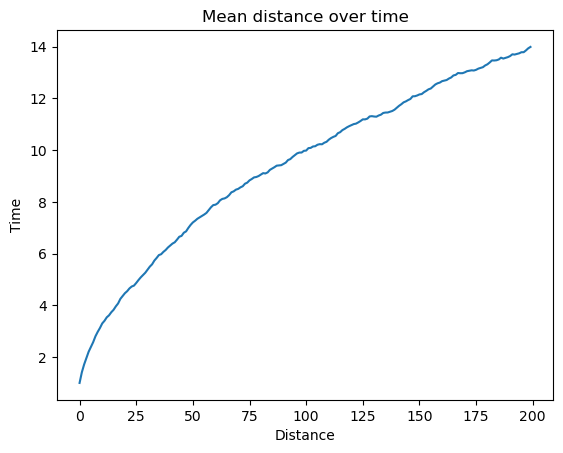

In [17]:
import numpy as np

walkers = np.random.choice([-1, 1], size=(1000, 200))

distance = np.cumsum(walkers, axis= 1)
distance = distance ** 2

mean_distance = np.sqrt(np.mean(distance, axis= 0))

plt.plot(np.arange(200), mean_distance)
plt.title('Mean distance over time')
plt.xlabel('Distance')
plt.ylabel('Time')
plt.show()

### 4.9 

Analyze a data file (15 MINUTES)
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

--2024-02-13 12:12:22--  https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3vigxoqayo389uc/populations.txt [following]
--2024-02-13 12:12:23--  https://www.dropbox.com/s/raw/3vigxoqayo389uc/populations.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf2f5c3913163d9804c90f29a27.dl.dropboxusercontent.com/cd/0/inline/CNOMB1DwvzMELtRMzJADrhV_IVbUoPAZqpeCYpw-esDTqO6UxngzxKCELyYhXbF3aUXHyh0ZCMlAXu5rXteoHmxR4WPS9JFVBCLvfI51Fh5qVgJOEVXPbZYUf3L0oDYj-g8/file# [following]
--2024-02-13 12:12:23--  https://ucf2f5c3913163d9804c90f29a27.dl.dropboxusercontent.com/cd/0/inline/CNOMB1DwvzMELtRMzJADrhV_IVbUoPAZqpeCYpw-esDTqO6UxngzxKCELyYhXbF3aUXHyh0ZCMlAXu5rXteoHmxR4WPS9JFVBCLvfI51Fh5qVgJ

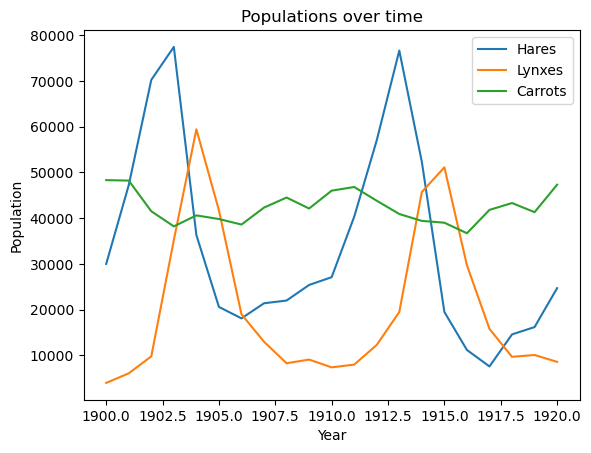

Means:
Hares: 34080.95238095238
Lynxes: 20166.666666666668
Carrots: 42400.0

Standard deviations:
Hares: 20897.906458089667
Lynxes: 16254.591536908763
Carrots: 3322.5062255844787

Correlation factors:
Hares vs Lynxes: 0.0718920607353557
Carrots vs Hares: -0.0166037777098794
Lynxes vs Carrots: 0.0718920607353557

 ['1900.0: Carrots', '1901.0: Carrots', '1902.0: Hares', '1903.0: Hares', '1904.0: Lynxes', '1905.0: Lynxes', '1906.0: Carrots', '1907.0: Carrots', '1908.0: Carrots', '1909.0: Carrots', '1910.0: Carrots', '1911.0: Carrots', '1912.0: Hares', '1913.0: Hares', '1914.0: Hares', '1915.0: Lynxes', '1916.0: Carrots', '1917.0: Carrots', '1918.0: Carrots', '1919.0: Carrots', '1920.0: Carrots']


In [36]:
! if [ ! -f populations.txt ]; then wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt; else echo "File already exists."; fi

populations= np.loadtxt('populations.txt')
print(populations)

year = populations[:, 0]
hares = populations[:, 1]
lynxes = populations[:, 2]
carrots = populations[:, 3]

plt.plot(year, hares, label='Hares')
plt.plot(year, lynxes, label='Lynxes')
plt.plot(year, carrots, label='Carrots')

plt.legend()
plt.title('Populations over time')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

mean_hares = np.mean(hares)
mean_lynxes = np.mean(lynxes)
mean_carrots = np.mean(carrots)

std_hares = np.std(hares)
std_lynxes = np.std(lynxes)
std_carrots = np.std(carrots)

corr_hares_lynxes = np.corrcoef(hares, lynxes)[0,1]
corr_carrots_hares = np.corrcoef(carrots, hares)[0,1]
corr_lynxes_hares = np.corrcoef(lynxes, hares)[0,1]

print('Means:')
print('Hares:', mean_hares)
print('Lynxes:', mean_lynxes)
print('Carrots:', mean_carrots)

print('\nStandard deviations:')
print('Hares:', std_hares)
print('Lynxes:', std_lynxes)
print('Carrots:', std_carrots)

print('\nCorrelation factors:')
print('Hares vs Lynxes:', corr_hares_lynxes)
print('Carrots vs Hares:', corr_carrots_hares)
print('Lynxes vs Carrots:', corr_lynxes_hares)

max_pop = []
for i in range(populations.shape[0]):
    if hares[i] > carrots[i] and hares[i] > lynxes[i]:
        max_pop.append(str(year[i]) + ': Hares')
    elif lynxes[i] > carrots[i] and lynxes[i] > hares[i]:
        max_pop.append(str(year[i]) + ': Lynxes')
    elif carrots[i] > hares[i] and carrots[i] > lynxes[i]:
        max_pop.append(str(year[i]) + ': Carrots')
    else: max_pop.append(str(year[i]) + ': ')
    
print('\n', max_pop)

# 5. OSEMN

### 5.4 

Load the binary file named *credit_card.dat* and convert the data into the real credit-card number (20 MINUTES).

Each line correspond to a credit card number.

Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [41]:
credit_card_numbers = []

with open('credit_card.dat', 'rb') as file:
    for num, line in enumerate(file):
        reverse_line = line[:-1]
        if (len(reverse_line) != 4):
            current_credit_card = []
            
            for i in range(int((len(reverse_line) - 4) / 6)):
                six_digits = reverse_line[i * 6: (i + 1) * 6]
                decimal_number = int(six_digits, 2)
                character = chr(decimal_number)
                current_credit_card.append(character)
                
            credit_card_numbers.append(''.join(current_credit_card))

for i, credit_card in enumerate(credit_card_numbers, start=1):
    print(f'Credit Card {i}: {credit_card}')

Credit Card 1: 7648 5673 3775 2271
Credit Card 2: 3257 8247 3354 2266
Credit Card 3: 2722 0001 4011 6652
Credit Card 4: 0661 3063 3742 3150
Credit Card 5: 0432 1608 1462 4742
Credit Card 6: 5827 2027 8785 7303
Credit Card 7: 5774 8528 2087 1117
Credit Card 8: 8140 1210 6352 2845
Credit Card 9: 5764 1133 7301 7100
Credit Card 10: 6456 1737 4126 6726
Credit Card 11: 1228 8631 7382 0000
Credit Card 12: 7051 0160 5374 3166
Credit Card 13: 0618 3587 1630 6376
Credit Card 14: 1545 5454 7444 5636
Credit Card 15: 6735 3116 3202 6834
Credit Card 16: 7287 5011 1547 8413
Credit Card 17: 7033 2607 3328 4200
Credit Card 18: 2568 5244 1874 5024
Credit Card 19: 1684 2253 7570 7118
Credit Card 20: 0672 2576 0575 6631
Credit Card 21: 6332 8353 8787 1340
Credit Card 22: 1813 3361 1175 4211
Credit Card 23: 2477 6450 8840 2368
Credit Card 24: 5512 3505 2563 1326
Credit Card 25: 3083 7882 0621 0025
Credit Card 26: 4521 5148 8045 0334
Credit Card 27: 7563 3654 8713 5787
Credit Card 28: 8324 2664 0476 5561
C

# 6. PANDAS

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

File already exists
         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0           1     0          123  3869200167        2374        26
1           1     0          124  3869200167        2374        27
2           1     0           63  3869200167        2553        28
3           1     0           64  3869200167        2558        19
4           1     0           64  3869200167        2760        25
...       ...   ...          ...         ...         ...       ...
1052889     1     0           48  3869209401         687         9
1052890     1     0           59  3869209401         681        19
1052891     1     0           63  3869209401         690        13
1052892     1     0           47  3869209401         692        19
1052893     1     0           56  3869209401         682         8

[1052894 rows x 6 columns]
Value of x: 3563
Estimated time: 979914075 ns
Total time: 980140993.3333334 ns
         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \

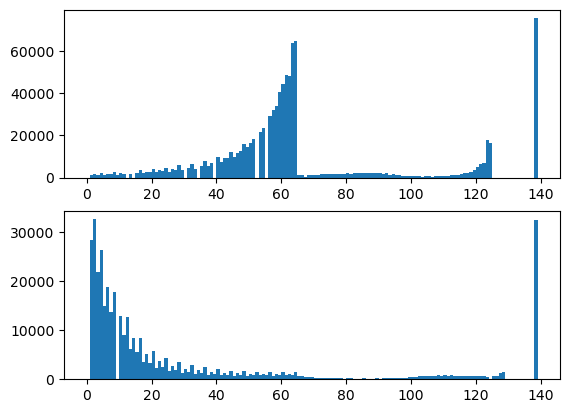

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

! if [ ! -f ./data_000637.txt ]; then wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt; else echo 'File already exists'; fi

d = pd.read_csv('data_000637.txt')
N = np.random.randint(10000, d.shape[0] + 1)

d1 = d.head(N)
print(d1)

bx_counter = d.groupby('ORBIT_CNT')['BX_COUNTER'].max()
print(f'Value of x: {bx_counter.max()}')

time_estimation = (bx_counter.max() * 25) * bx_counter.shape[0]
total_time = (d.iloc[-1, 3] - d.iloc[0, 3]) * 25 * bx_counter.max() + (d.iloc[-1, 4] - d.iloc[0, 4]) * 25 + (d.iloc[-1, 5] - d.iloc[0, 5]) * 25/30
print(f'Estimated time: {time_estimation} ns')
print(f'Total time: {total_time} ns')

d['TOTAL_TIME'] = (d['ORBIT_CNT'] - d.iloc[0, 3]) * 25 * bx_counter.max() + (d['BX_COUNTER'] - d.iloc[0, 4]) * 25 + (d['TDC_MEAS'] - d.iloc[0, 5]) * 25/30
print(d)

d['HEAD'] = np.random.randint(0, 2, size=d.shape[0])
print(d)

d2 = d[d['HEAD'] == 1]
print(d2)

fpga0 = d[d['FPGA'] == 0]
fpga1 = d[d['FPGA'] == 1]

plt.subplot(2, 1, 1)
plt.hist(fpga0['TDC_CHANNEL'], bins=range(0, 140))
plt.subplot(2, 1, 2)
plt.hist(fpga1['TDC_CHANNEL'], bins=range(0, 140))

noise = d.groupby('TDC_CHANNEL').count()
noise = noise.sort_values(by='HEAD', ascending= False)
print(noise.head(3))

unique_orbits = d['ORBIT_CNT'].unique()
print(f'Unique orbits number: {unique_orbits.shape[0]}')

orbits_139 = d[d['TDC_CHANNEL'] == 139]
unique_orbits_139 = orbits_139['ORBIT_CNT'].unique()
print(f'Unique orbits with at least one measurement in channel 139 number: {unique_orbits_139.shape[0]}')

# 7. VISUALIZATION

### 7.1 **Kernel Density Estimate** (40 MINUTES)

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method

[ 0.07893697 -0.03070862  0.13168064 -0.18589297  1.58467816  1.47077904
  0.51435491 -1.04952443  0.07786583  1.149743    1.32106957  0.90620204
 -1.51961936  0.88380433  0.30168672 -1.78735331  0.53375647 -1.02397799
  1.52313084 -0.47108797 -0.49966443  0.39515314 -0.80212842 -1.56420446
 -0.25906643  0.0488608  -0.14490127 -1.57245189 -0.67315225 -1.07980654
  0.69229788 -0.31406464 -0.17855865 -0.59801424  0.45329533 -0.64703846
  0.1246884  -2.41421621 -1.86785565  0.16866372 -0.31003864  0.01222817
 -0.1112828  -1.30769494  1.33191838 -0.32674301  0.71396745  0.47298096
  0.29264325 -0.35515842 -0.43549015  0.26498414  1.08614699  0.34587377
 -0.90138664 -2.1138737   0.14233642 -0.30883802 -1.4014751  -2.88674938
 -0.11702547 -1.03666573  0.36986218 -0.38322144  0.51786717 -2.11629932
 -1.12085871  0.30960748  1.27656946 -0.68121004  0.4308368  -1.30166217
  0.35451197  1.25980073  0.88667169  2.31848299 -0.35046529 -0.64565982
  0.89969898  1.13549569  0.647252   -0.21829675 -0

/tmp/ipykernel_26676/1537723069.py:31: RuntimeWarning: divide by zero encountered in divide
  errors = 1/np.sqrt(hist)


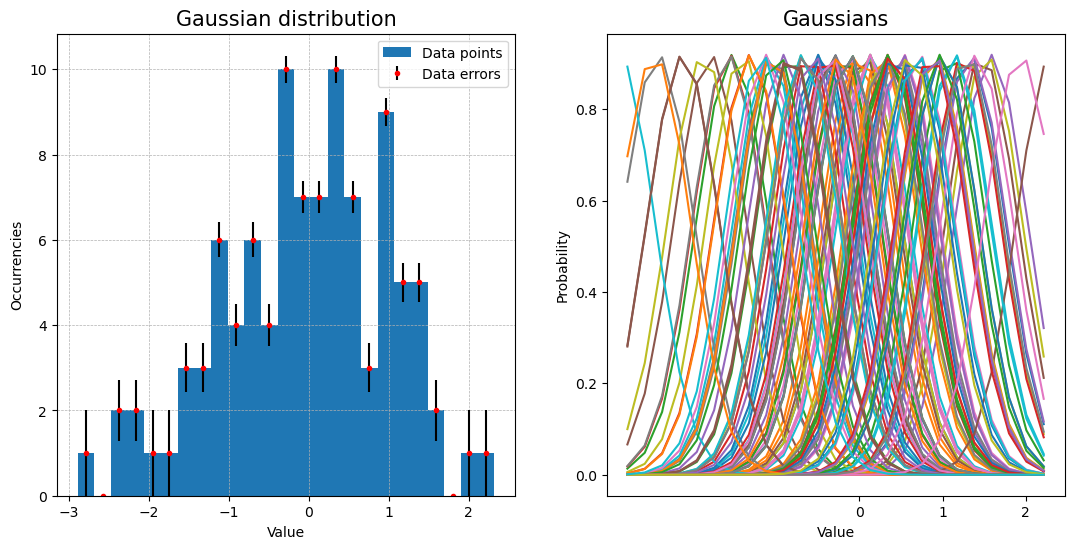

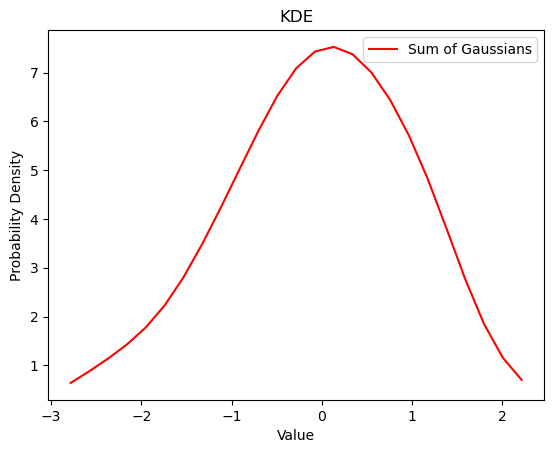

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate

N = 100
mean = 0
std = 1

x = np.random.normal(loc= mean, scale= std, size= N)
print(x)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 6))

ax1.grid(linestyle='--', linewidth=0.5)

ax1.set_title('Gaussian distribution', size=15)
ax1.set_xlabel('Value')
ax1.set_ylabel('Occurrencies')

ax2.set_title('Gaussians', size=15)
ax2.set_xlabel('Value')
ax2.set_ylabel('Probability')

hist, bins, _ = ax1.hist(x, bins= 25, label='Data points')
bin_centers = (bins[:-1] + bins[1:]) / 2
bin_width = bins[1] - bins[0]

plt.xticks(np.arange(min(x), max(x) + 1, 1))
plt.xticks(np.arange(min(hist), max(hist) + 1, 1))

errors = 1/np.sqrt(hist)

ax1.errorbar(bin_centers, hist, yerr=errors, color='red', ecolor='black', fmt='.', label='Data errors')
ax1.legend()

std_default = 1.06 * x.std() * (x.size ** (-1/5))
gaussians = []

for value in x:
    gaussian = stats.norm.pdf(bin_centers, loc=value, scale=std_default)
    gaussians.append(gaussian)
    
for gaussian in gaussians:
    ax2.plot(bin_centers, gaussian)
    
plt.show()

sum_of_gaussians = sum(gaussians)

integral_hist = integrate.trapz(hist, bin_centers)
integral_gauss = integrate.trapz(sum_of_gaussians, bin_centers)

sum_of_gaussians /= (integral_gauss / integral_hist)

plt.plot(bin_centers, sum_of_gaussians, label='Sum of Gaussians', color='red')
plt.title('KDE')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

plt.show()

### 7.2\. **Color-coded scatter plot** (10 MINUTES)

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

/tmp/ipykernel_26676/816753254.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(element[:,0], element[:,1], c=color, label=f'Category {i}')


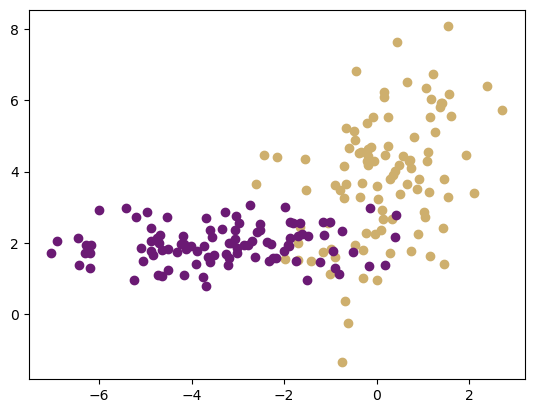

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def dataset_generator(loc=[[]], scale=[[]], size=N):
    gaussians = []
    for i in range(len(loc)):
        gaussian = np.random.multivariate_normal(mean=loc[i], cov=scale[i], size=N)
        gaussians.append(gaussian)
    
    return gaussians

N = 100

mean1 = [0, 4]
mean2 = [-3, 2]

cov_mat1 = [[1, 0.5], 
            [0.5, 3]]
cov_mat2 = [[4, 0.15],
            [0.15, 0.25]]

dataset = dataset_generator(loc=[mean1, mean2], scale=[cov_mat1, cov_mat2], size=N)

for i , element in enumerate(dataset):
    color = np.random.rand(3,)
    plt.scatter(element[:,0], element[:,1], c=color, label=f'Category {i}')

### 7.3\. **Profile plot** (30 MINUTES)

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

File already existing.
       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
2      -7.200000        3.4
3      -4.150000        8.4
4      -6.590000        1.7
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[11131 rows x 2 columns]
LinregressResult(slope=0.003259770122030576, intercept=-0.15432816763069465, rvalue=0.04340351052255905, pvalue=8.71703718357661e-06, stderr=0.0007327014008445781, intercept_stderr=0.008458951961471829)


/home/kallo27/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kallo27/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


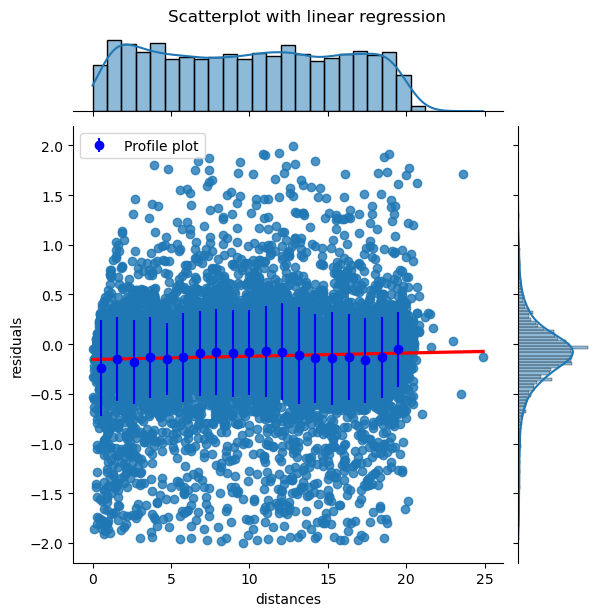

In [8]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

! if [ ! -f residuals_261.npy ]; then wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy; else echo "File already existing."; fi

dataset = pd.DataFrame(np.load('residuals_261.npy', allow_pickle=True).item())
print(dataset)

dataset = dataset[np.abs(dataset['residuals']) < 2]
lin_regression = stats.linregress(y= dataset['residuals'], x= dataset['distances'])
print(lin_regression)

scatter_plot = sns.jointplot(x= 'distances', y='residuals', data=dataset, kind='reg', line_kws = {'color' : 'red'})
scatter_plot.figure.suptitle('Scatterplot with linear regression', y = 1.02)

bins = np.linspace(0, 20, num=20)
x = (bins[:-1] + bins[1:])/2

y, _, _ = stats.binned_statistic(dataset['distances'], dataset['residuals'], statistic='mean', bins=bins)
erry, _, _ = stats.binned_statistic(dataset['distances'], dataset['residuals'], statistic='std', bins=bins)

plt.errorbar(x, y, yerr=erry, fmt='o', color= 'blue', label='Profile plot')
plt.legend()
plt.show()

# 8. LINEAR ALGEBRA

### 8.1\. **PCA on 3D dataset** (45 MINUTES)
 
* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.

### 8.3 \. **Looking at an oscillating spring** (60 MINUTES)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


# 9. ALGORITHMS 

### 9.1\. **Maximum wind speed prediction at the Sprogø station** (30 MINUTES)

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```

In [12]:
import numpy as np
from scipy.interpolate import UnivariateSpline


max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]

cprob = np.arange(1, years_nb + 1) / (years_nb + 1)
max_speeds = np.sort(max_speeds)

quantile_func = UnivariateSpline(cprob, max_speeds, s=0)

fifty_prob = 1. - 0.02

fifty_wind = quantile_func(fifty_prob)

print(f'The maximum wind speed occurring every 50 years is expected to be: {fifty_wind} m/s.')


The maximum wind speed occurring every 50 years is expected to be: 36.96971413811491 m/s.


### 9.2\. **Curve fitting of temperature in Alaska** (20 MINUTES)

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

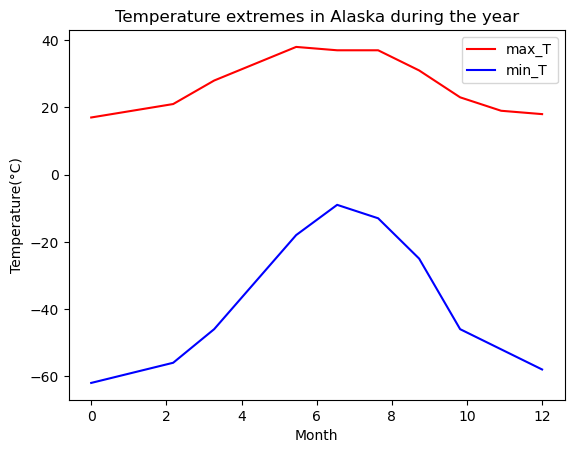

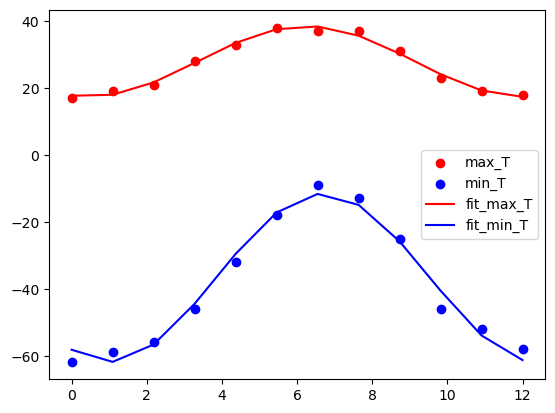

The time offset between the fit for the max and the min temperatures is: 3.4400387559139918 months.


In [36]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

max_T = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
min_T = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

months = np.linspace(0, 12, 12)

plt.plot(months, max_T, color='red', label='max_T')
plt.plot(months, min_T, color='blue', label='min_T')

plt.title('Temperature extremes in Alaska during the year')
plt.xlabel('Month')
plt.ylabel('Temperature(°C)')

plt.legend()
plt.show()

def temperature(month, ampl, frequency, offset, phi):
    return ampl * np.sin((month * frequency) + phi) + offset

popt_min, pcov_min = curve_fit(temperature, months, min_T, p0=[-40, np.pi / 6, 0, 0])
popt_max, pcov_max = curve_fit(temperature, months, max_T, p0=[20, np.pi / 6, 0, 0])

fit_min_T = temperature(months, *popt_min)
fit_max_T = temperature(months, *popt_max)

plt.scatter(months, max_T, color='red', label='max_T')
plt.scatter(months, min_T, color='blue', label='min_T')

plt.plot(months, fit_max_T, color='red', label='fit_max_T')
plt.plot(months, fit_min_T, color='blue', label='fit_min_T')

plt.legend()
plt.show()

time_difference = np.abs(popt_max[3] - popt_min[3])

print(f'The time offset between the fit for the max and the min temperatures is: {time_difference} months.')

### 9.3\. **2D minimization of a six-hump camelback function** (20 MINUTES)

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?

Minimal value of the function: -1.0316284523624513
Position of the minimum: [-0.08983846  0.71264471]


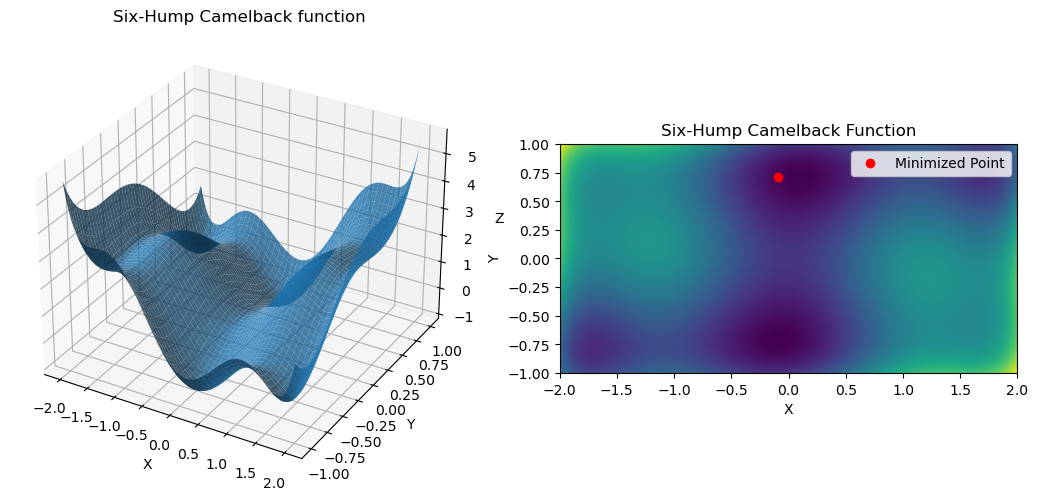

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def camelback(x):
    return (4 - 2.1 * x[0]**2 + (x[0]**4)/3)*(x[0])**2 + x[0] * x[1] + (4 * x[1]**2 - 4) * (x[1])**2

x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-1, 1, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = camelback([X, Y])

x0 = [0, 0.5]
bounds = [(-2, 2), (-1, 1)]

result = minimize(camelback, x0= x0, bounds=bounds, method='SLSQP')

print(f'Minimal value of the function: {result.fun}')
print(f'Position of the minimum: {result.x}')

fig = plt.figure(figsize=(13, 12))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.8)
ax.set_title('Six-Hump Camelback function')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax = fig.add_subplot(122)
ax.imshow(Z, extent=[-2, 2, -1, 1], cmap='viridis', vmin=Z.min(), vmax=Z.max())
ax.plot(result.x[0], result.x[1], 'ro', label='Minimized Point')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Six-Hump Camelback Function')
plt.legend()

### 9.5\. **FFT of an image** (30 MINUTES)

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

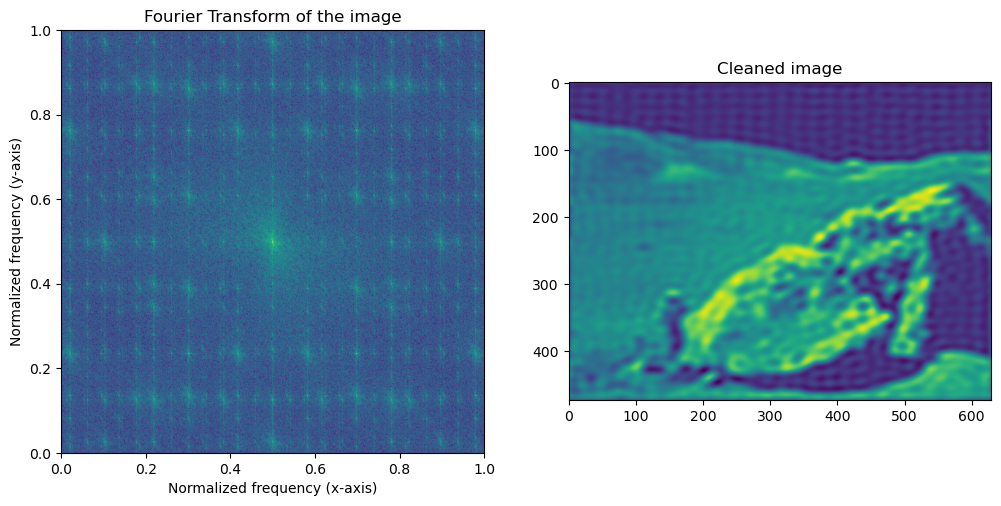

In [33]:
import numpy as np
from pylab import imread
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fft2, fftshift, ifft2

image = imread('moonlanding.png').astype(float)

transformed_image = fft2(image)
transformed_image = fftshift(transformed_image)

figure = plt.figure(figsize=(12, 12))
ax = figure.add_subplot(121)
ax.imshow(np.log(np.abs(transformed_image) + 1), extent=[0, 1, 0, 1])
ax.set_title('Fourier Transform of the image')
ax.set_xlabel('Normalized frequency (x-axis)')
ax.set_ylabel('Normalized frequency (y-axis)')

rows, cols = image.shape
r, c = rows // 2, cols // 2
radius = 30
mask = np.ones((rows, cols), dtype=bool)
x, y = np.ogrid[-r:rows - r, -c:cols - c]
mask[x**2 + y**2 <= radius**2] = False

image_filtered = transformed_image.copy()
image_filtered[mask] = 0

image_cleaned = np.abs(ifft2(fftshift(image_filtered)))

ax = figure.add_subplot(122)
ax.imshow(image_cleaned)
ax.set_title('Cleaned image')

plt.show()

# 10. MONTECARLO

### 10.1\. **Radioactive decay chain** (30 MINUTES)

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

### 10.2\. **Rutherford Scattering** (30 MINUTES)

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

### 10.3\. **Monte Carlo integration: hit/miss vs mean value method** (30 MINUTES)

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

### 10.4\. **Monte Carlo integration in high dimension** (30 MINUTES)

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere

### 10.5\. **Monte Carlo integration with importance sampling**  (30 MINUTES)

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84